In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Generate data

In [2]:
np.random.seed(42)

In [3]:
# generate test data
L = 100  # number of data sets
N = 25  # number of data points
sigma = 0.3  # s.d. of the Gaussian noise

In [4]:
x = np.tile(np.linspace(0, 1, N), (L, 1))
x.shape

(100, 25)

In [5]:
t = np.sin(2 * np.pi * x) + sigma * np.random.randn(L, N)

In [6]:
t.shape

(100, 25)

In [7]:
# for plotting the ground truth curve
x_test = np.linspace(0, 1, 1000)
t_test = np.sin(2 * np.pi * x_test)

# Analysis

In [8]:
num_gauss = 24  # number of Gaussian basis function (not including the bias term)
s = 0.05  # scale parameter of the Gaussian basis function

In [9]:
def phi(x, mu, s):
    """apply Gaussian basis function
    
    Args:
        x (np.array): input
        mu (float): location parameter
        s (float): scale parameter
        
    Returns:
        phi_i(x) (np.array)
    """
    return np.exp(- (x - mu) ** 2 / (2 * s ** 2))

In [10]:
def create_design_matrix(x, num_gauss, s):
    """create a design matrix for polynomial regression
    
    Args:
        x (np.array): observations (N, )
        num_gauss (int): number of Gaussian basis function (not including the bias)
        s (float): scale paramter of the Gaussian basis function
    
    Returns:
        Phi (np.array): design matrix in PRML (3.16), (N, M)
    """
    mu_array = np.linspace(0, 1, num_gauss)
    Phi = []
    for m in range(num_gauss):
        if m == 0:
            Phi.append(np.ones(len(x), ))
        Phi.append(phi(x, mu_array[m], s))
    Phi = np.array(Phi).T
    
    return Phi

In [11]:
def solve_normal_equation(Phi, t, ln_lambda):
    """solve the normal equation for linear reqression (3.15)
    
    Args:
        Phi (np.array): design matrix (N, M)
        t (np.array): target values (N, )
        ln_lambda (float): natural log of the regularization parameter
    
    Returns:
        w_ML (np.array): coefficients including the bias term (M + 1, )
    """
    lambda_ = np.exp(ln_lambda)
    M = Phi.shape[1]
    A = lambda_ * np.eye(M) + Phi.T @ Phi
    B = Phi.T @ t
    w_ML = np.linalg.solve(A, B)  # faster and numerically more stable than np.linalg.inv
    
    return w_ML

In [12]:
def poly_fit(x, t, x_test, num_gauss, s, ln_lambda):
    """
    Args:
        x (np.array): inputs (N, )
        t (np.array): target values (N, )
        x_test (np.array): input values for making predictions (N_test, )
        num_gauss (int): number of Gaussian basis functions
        s (float): scale parameter of the Gaussian basis functions
        ln_lambda (float): natural log of theregularization paramter
        
    Returns:
        t_pred (np.array): predicted values for x_test (N_test, )
        w_ML (np.array): coefficients (M, 1)
    """
    # maximum likelihood estimation
    Phi = create_design_matrix(x, num_gauss, s)
    w_ML = solve_normal_equation(Phi, t, ln_lambda)
    
    # prediction
    Phi_2 = create_design_matrix(x_test, num_gauss, s)
    t_pred = Phi_2 @ w_ML
    
    return t_pred, w_ML

In [13]:
def multiple_fits(x, t, x_test, num_gauss, s, ln_lambda):
    """perform multiple fits over the entire dataset
    
    Args:
        x (np.array): inputs (L, N)
        t (np.array): targets (L, N)
        x_test (np.array): inputs for making the prediction (N_test, )
        num_gauss (int): number of Gaussian basis functions
        ln_lambda (float): regularization parameter
    
    Returns:
        T (np.array)
    """
    
    T = []
    for l in range(L):
        t_pred, _ = poly_fit(x[l], t[l], x_test, num_gauss, s, ln_lambda)
        T.append(t_pred)
    T = np.array(T)
    
    return T

In [14]:
def plot_results(x_test, T, ln_lambda, N_plot=None):
    """plots the results of the predictions
    
    Args:
        x_test (np.array): input values for the predictions (N_test, )
        T (np.array): predictions of the target (N_plot, N_test)
        ln_lambda (float): log of the regularization paramter
        N_plot (int): number of fits to display, if None display all
        
    Returns:
        None:
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
    
    if N_plot is None:
        ax[0].plot(x_test, T.T, 'r', lw=0.5)  # plot all
    else:
        assert N_plot <= T.shape[0], f'Can only plot {T.shape[0]} trials'
        idx = random.sample(range(T.shape[0]), N_plot)
        ax[0].plot(x_test, T[idx].T, 'r', lw=0.5)  # plot all
    
    ax[0].set_xticks([0, 1.0])
    ax[0].set_yticks([-1.0, 0, 1.0])
    ax[0].text(x=0.5, y=0.9, s=r'ln $\lambda$ = ' + f'{ln_lambda}', fontsize=14) 
    
    ax[1].plot(x_test, T.mean(axis=0), 'r')
    ax[1].plot(x_test, t_test, 'g')
    ax[1].set_xticks([0, 1.0])
    ax[1].set_ylim(-1.75, 1.75)
    plt.show()

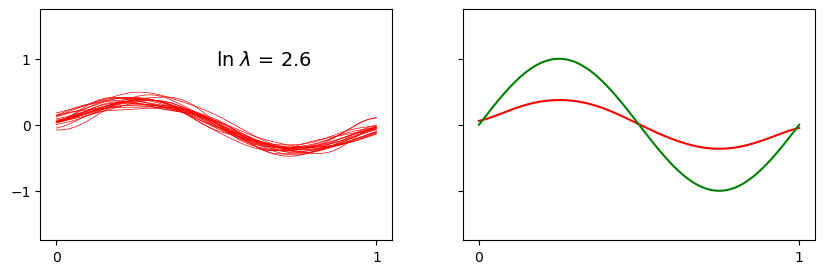

In [15]:
ln_lambda = 2.6
T = multiple_fits(x, t, x_test, num_gauss, s, ln_lambda)
plot_results(x_test, T, ln_lambda, N_plot=20)

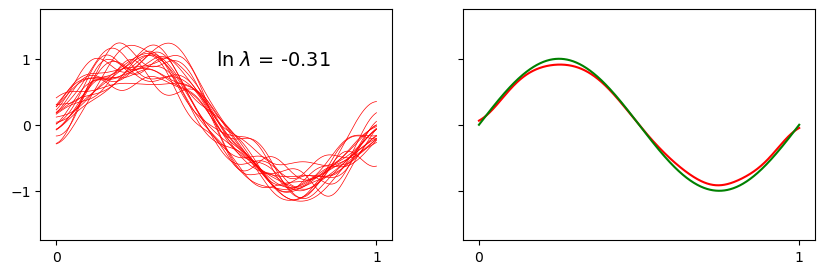

In [16]:
ln_lambda = -0.31
T = multiple_fits(x, t, x_test, num_gauss, s, ln_lambda)
plot_results(x_test, T, ln_lambda, N_plot=20)

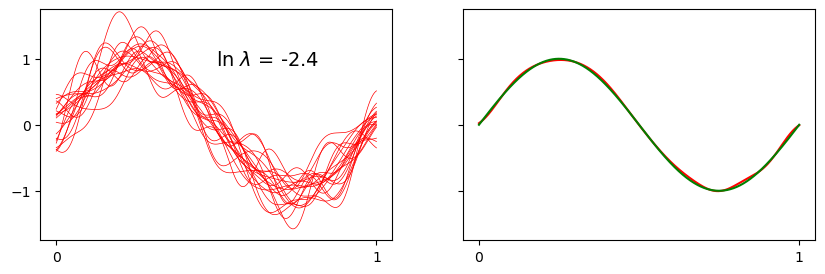

In [17]:
ln_lambda = -2.4
T = multiple_fits(x, t, x_test, num_gauss, s, ln_lambda)
plot_results(x_test, T, ln_lambda, N_plot=20)